<a href="https://colab.research.google.com/github/imilyas95/DeepL_Projects/blob/main/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd 'drive/My Drive/Kaggle Courses/Intro to Deep Learning/Spotify'

/content/drive/My Drive/Kaggle Courses/Intro to Deep Learning/Spotify


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

#Building a pipeline and preprocessing the Data

In [4]:
spotify = pd.read_csv('spotify.csv')
X = spotify.copy().dropna()
y = X.pop('track_popularity')

artists = X['track_artist']
features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

def group_split(X, y, group, train_size = 0.75):
  splitter = GroupShuffleSplit(train_size = train_size)
  train, test = next(splitter.split(X, y, groups = group))
  return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])


X_train, X_valid, y_train, y_valid = group_split(X, y, artists)
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


# Starting with the simplest network, a linear model

Minimum Validation Loss: 0.1974


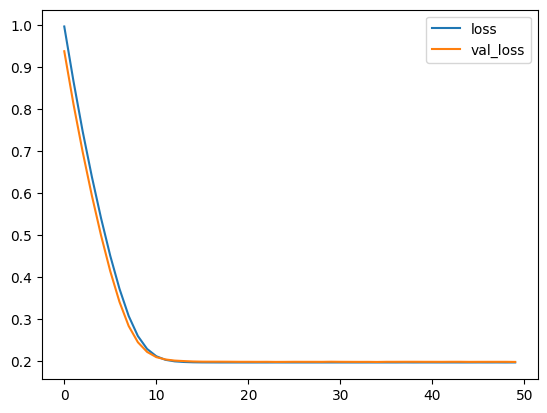

In [5]:
model = keras.Sequential([
    layers.Dense(1, input_shape = input_shape)
])

model.compile(
    optimizer = 'adam',
    loss = 'mae',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 512,
    epochs = 50,
    verbose = 0
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Minimum Validation Loss: 0.1974


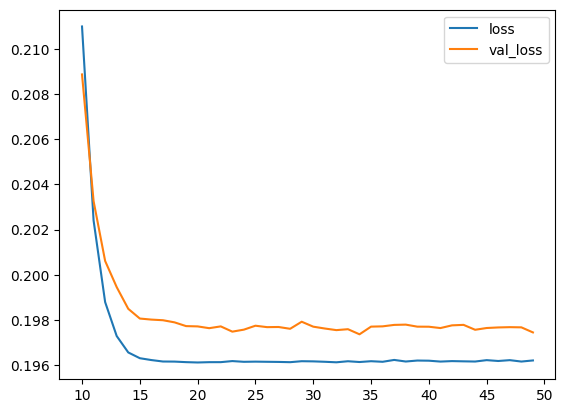

In [6]:
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

#Adding hidden layers and checking the performance

Epoch 1/50
49/49 [==============================] - 3s 20ms/step - loss: 0.2314 - accuracy: 0.0626 - val_loss: 0.2086 - val_accuracy: 0.0585
Epoch 2/50
49/49 [==============================] - 0s 9ms/step - loss: 0.2008 - accuracy: 0.0661 - val_loss: 0.2022 - val_accuracy: 0.0634
Epoch 3/50
49/49 [==============================] - 1s 14ms/step - loss: 0.1952 - accuracy: 0.0672 - val_loss: 0.2006 - val_accuracy: 0.0614
Epoch 4/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1924 - accuracy: 0.0674 - val_loss: 0.1993 - val_accuracy: 0.0637
Epoch 5/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1899 - accuracy: 0.0671 - val_loss: 0.2001 - val_accuracy: 0.0656
Epoch 6/50
49/49 [==============================] - 0s 9ms/step - loss: 0.1884 - accuracy: 0.0676 - val_loss: 0.1979 - val_accuracy: 0.0642
Epoch 7/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1876 - accuracy: 0.0680 - val_loss: 0.1984 - val_accuracy: 0.0647
Epoch 8/50
49/49 [

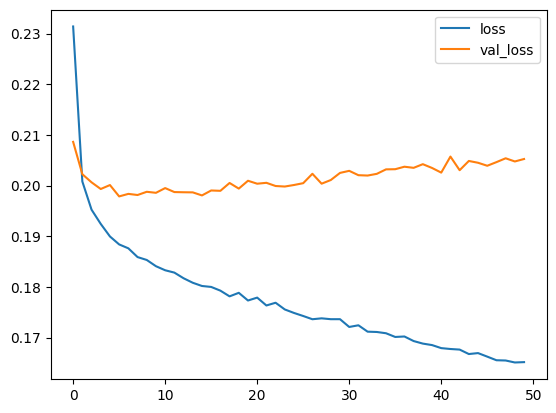

In [7]:
model = keras.Sequential([
    layers.Dense(128, activation ='relu', input_shape=input_shape),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1)
])

model.compile(
    optimizer = 'adam',
    loss = 'mae',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 512,
    epochs = 50
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss','val_loss']].plot()
print("Minimum validation loss: {:0.4f}".format(history_df['val_loss'].min()))

# Performace of the Model after using callbacks to avoid Overfitting

In [8]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 5,
    restore_best_weights = True,
)

Epoch 1/50
49/49 [==============================] - 1s 7ms/step - loss: 0.2325 - accuracy: 0.0624 - val_loss: 0.2072 - val_accuracy: 0.0660
Epoch 2/50
49/49 [==============================] - 0s 5ms/step - loss: 0.2009 - accuracy: 0.0653 - val_loss: 0.2018 - val_accuracy: 0.0631
Epoch 3/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1961 - accuracy: 0.0667 - val_loss: 0.2008 - val_accuracy: 0.0612
Epoch 4/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1927 - accuracy: 0.0676 - val_loss: 0.2008 - val_accuracy: 0.0650
Epoch 5/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1902 - accuracy: 0.0679 - val_loss: 0.2000 - val_accuracy: 0.0624
Epoch 6/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1890 - accuracy: 0.0680 - val_loss: 0.1993 - val_accuracy: 0.0583
Epoch 7/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1874 - accuracy: 0.0682 - val_loss: 0.1979 - val_accuracy: 0.0637
Epoch 8/50
49/49 [==

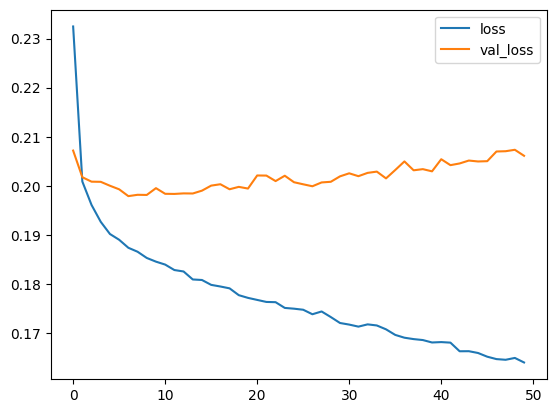

In [9]:
model = keras.Sequential([
    layers.Dense(128, activation ='relu', input_shape=input_shape),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1)
])

model.compile(
    optimizer = 'adam',
    loss = 'mae',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 512,
    epochs = 50
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss','val_loss']].plot()
print("Minimum validation loss: {:0.4f}".format(history_df['val_loss'].min()))

# Performance after adding Dropout layer

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation ='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

model.compile(
    optimizer = 'adam',
    loss = 'mae',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 512,
    epochs = 50
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss','val_loss']].plot()
print("Minimum validation loss: {:0.4f}".format(history_df['val_loss'].min()))

Epoch 1/50
49/49 [==============================] - 3s 11ms/step - loss: 0.2839 - accuracy: 0.0569 - val_loss: 0.2151 - val_accuracy: 0.0732
Epoch 2/50
49/49 [==============================] - 0s 6ms/step - loss: 0.2257 - accuracy: 0.0658 - val_loss: 0.2112 - val_accuracy: 0.0749
Epoch 3/50
49/49 [==============================] - 0s 6ms/step - loss: 0.2163 - accuracy: 0.0668 - val_loss: 0.2093 - val_accuracy: 0.0758
Epoch 4/50
49/49 [==============================] - 0s 4ms/step - loss: 0.2104 - accuracy: 0.0679 - val_loss: 0.2051 - val_accuracy: 0.0757
Epoch 5/50
49/49 [==============================] - 0s 5ms/step - loss: 0.2056 - accuracy: 0.0694 - val_loss: 0.2032 - val_accuracy: 0.0753
Epoch 6/50
49/49 [==============================] - 0s 5ms/step - loss: 0.2038 - accuracy: 0.0686 - val_loss: 0.2021 - val_accuracy: 0.0748
Epoch 7/50
49/49 [==============================] - 0s 5ms/step - loss: 0.2019 - accuracy: 0.0684 - val_loss: 0.2007 - val_accuracy: 0.0745
Epoch 8/50
48/49 [=

It can be seen that by adding dropout layers the validation loss has improved and the overfitting has been removed.